**FORECASTING SAHAM TELKOM**

**BACHTIAR RIZKY ALAMSYAH**

# **Import Library**

In [ ]:
# Install dan import library
!pip install pandas_ta
import pandas as pd
import pandas_ta as ta
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error, mean_absolute_percentage_error

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 115.1/115.1 kB 1.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pandas_ta: filename=pandas_ta-0.3.14b0-py3-none-any.whl size=218907 sha256=ddf15d39f2a04e1a1e70a37174aae888f96b809cabe6994ee80a0003f5d12e60
  Stored in directory: /root/.cache/pip/wheels/69/00/ac/f7fa862c34b0e2ef320175100c233377b4c558944f12474cf0
Successfully built pandas_ta


# **Load Dataset**

In [ ]:
# Load Dataset
tlkm = pd.read_csv('https://raw.githubusercontent.com/bachtiarrizkyal/Dataset/main/TLKM.JK.csv')
tlkm

,Date,Open,High,Low,Close,Adj Close,Volume
0,2018-12-18,3700.0,3740.0,3680.0,3740.0,3093.818848,79833100.0
1,2018-12-19,3740.0,3810.0,3740.0,3810.0,3151.724609,81542500.0
2,2018-12-20,3810.0,3810.0,3720.0,3740.0,3093.818848,100129200.0
3,2018-12-21,3700.0,3770.0,3700.0,3760.0,3110.363281,114752300.0
4,2018-12-24,3760.0,3760.0,3760.0,3760.0,3110.363281,0.0
...,...,...,...,...,...,...,...
1229,2023-12-11,3870.0,3980.0,3850.0,3980.0,3980.000000,99365500.0
1230,2023-12-12,3940.0,3950.0,3890.0,3910.0,3910.000000,58707700.0
1231,2023-12-13,3870.0,3920.0,3870.0,3920.0,3920.000000,54386800.0
1232,2023-12-14,3880.0,3960.0,3880.0,3940.0,3940.000000,70705300.0


# **Analisis Diagnostik**

In [ ]:
# Menampilkan informasi terkait dataset tlkm
tlkm.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1234 entries, 0 to 1233
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       1234 non-null   object 
 1   Open       1233 non-null   float64
 2   High       1233 non-null   float64
 3   Low        1233 non-null   float64
 4   Close      1233 non-null   float64
 5   Adj Close  1233 non-null   float64
 6   Volume     1233 non-null   float64
dtypes: float64(6), object(1)
memory usage: 67.6+ KB


In [ ]:
# Melakukan drop pada baris yang terdapat data yang kosong pada dataframe tlkm
tlkm = tlkm.dropna()

In [ ]:
# Menampilkan informasi kembali terkait dataframe tlkm
tlkm.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1233 entries, 0 to 1233
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       1233 non-null   object 
 1   Open       1233 non-null   float64
 2   High       1233 non-null   float64
 3   Low        1233 non-null   float64
 4   Close      1233 non-null   float64
 5   Adj Close  1233 non-null   float64
 6   Volume     1233 non-null   float64
dtypes: float64(6), object(1)
memory usage: 77.1+ KB


In [ ]:
# Menampilkan terkait ringkasan statistik deskriptif pada dataframe tlkm
tlkm.describe()

,Open,High,Low,Close,Adj Close,Volume
count,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000,1.233000e+03
mean,3774.160584,3815.012165,3731.111111,3772.587186,3415.364214,1.074264e+08
std,467.270289,465.413537,467.339612,468.944178,517.296011,7.300658e+07
min,2550.000000,2590.000000,2450.000000,2560.000000,2197.174072,0.000000e+00
25%,3400.000000,3440.000000,3360.000000,3400.000000,3035.790039,6.548540e+07
50%,3820.000000,3850.000000,3780.000000,3820.000000,3446.711914,8.976850e+07
75%,4110.000000,4160.000000,4060.000000,4110.000000,3838.458984,1.273160e+08
max,4850.000000,4850.000000,4720.000000,4770.000000,4558.169922,1.155861e+09


<ipython-input-9-203254dc9ce0>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tlkm['Date'] = pd.to_datetime(tlkm['Date'])


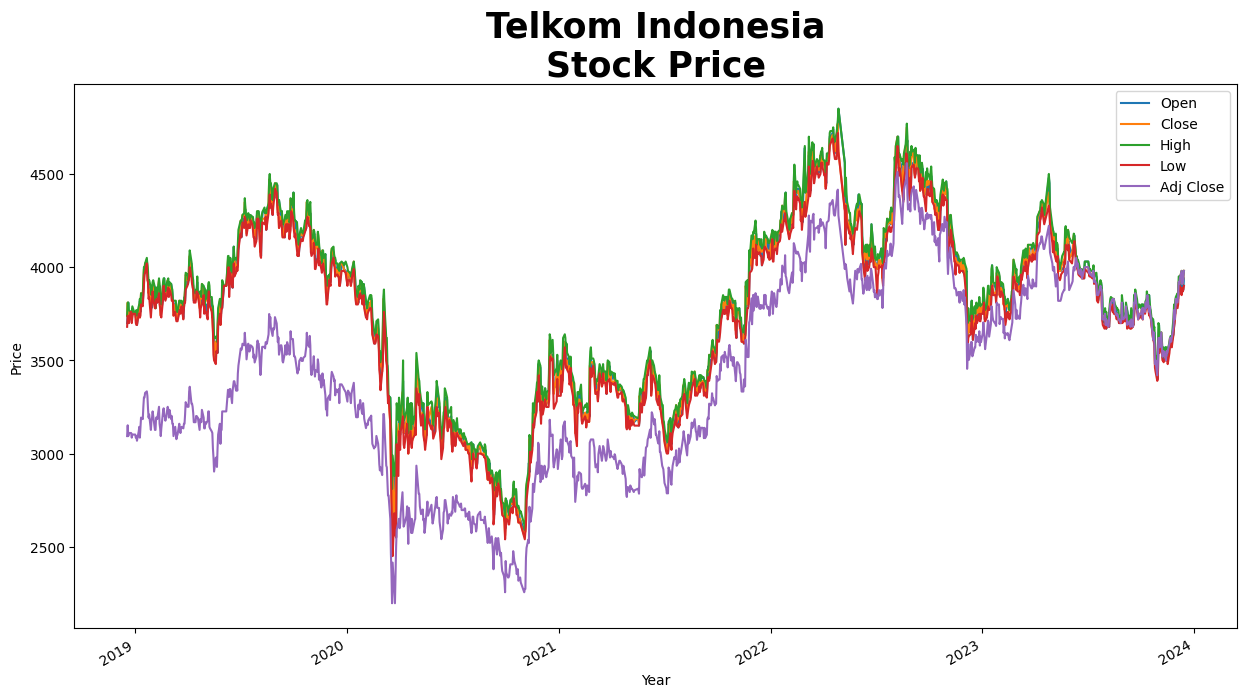

In [ ]:
# Menampilkan grafik terkait kolom Open, Close, High, Low, dan Adj Close pada dataframe tlkm
tlkm['Date'] = pd.to_datetime(tlkm['Date'])
tlkm.plot(x='Date', y=['Open', 'Close', 'High', 'Low', 'Adj Close'], figsize=(15, 8))
plt.ylabel('Price')
plt.xlabel('Year')
plt.title("Telkom Indonesia\nStock Price", fontsize=25, fontweight='bold')
plt.show()

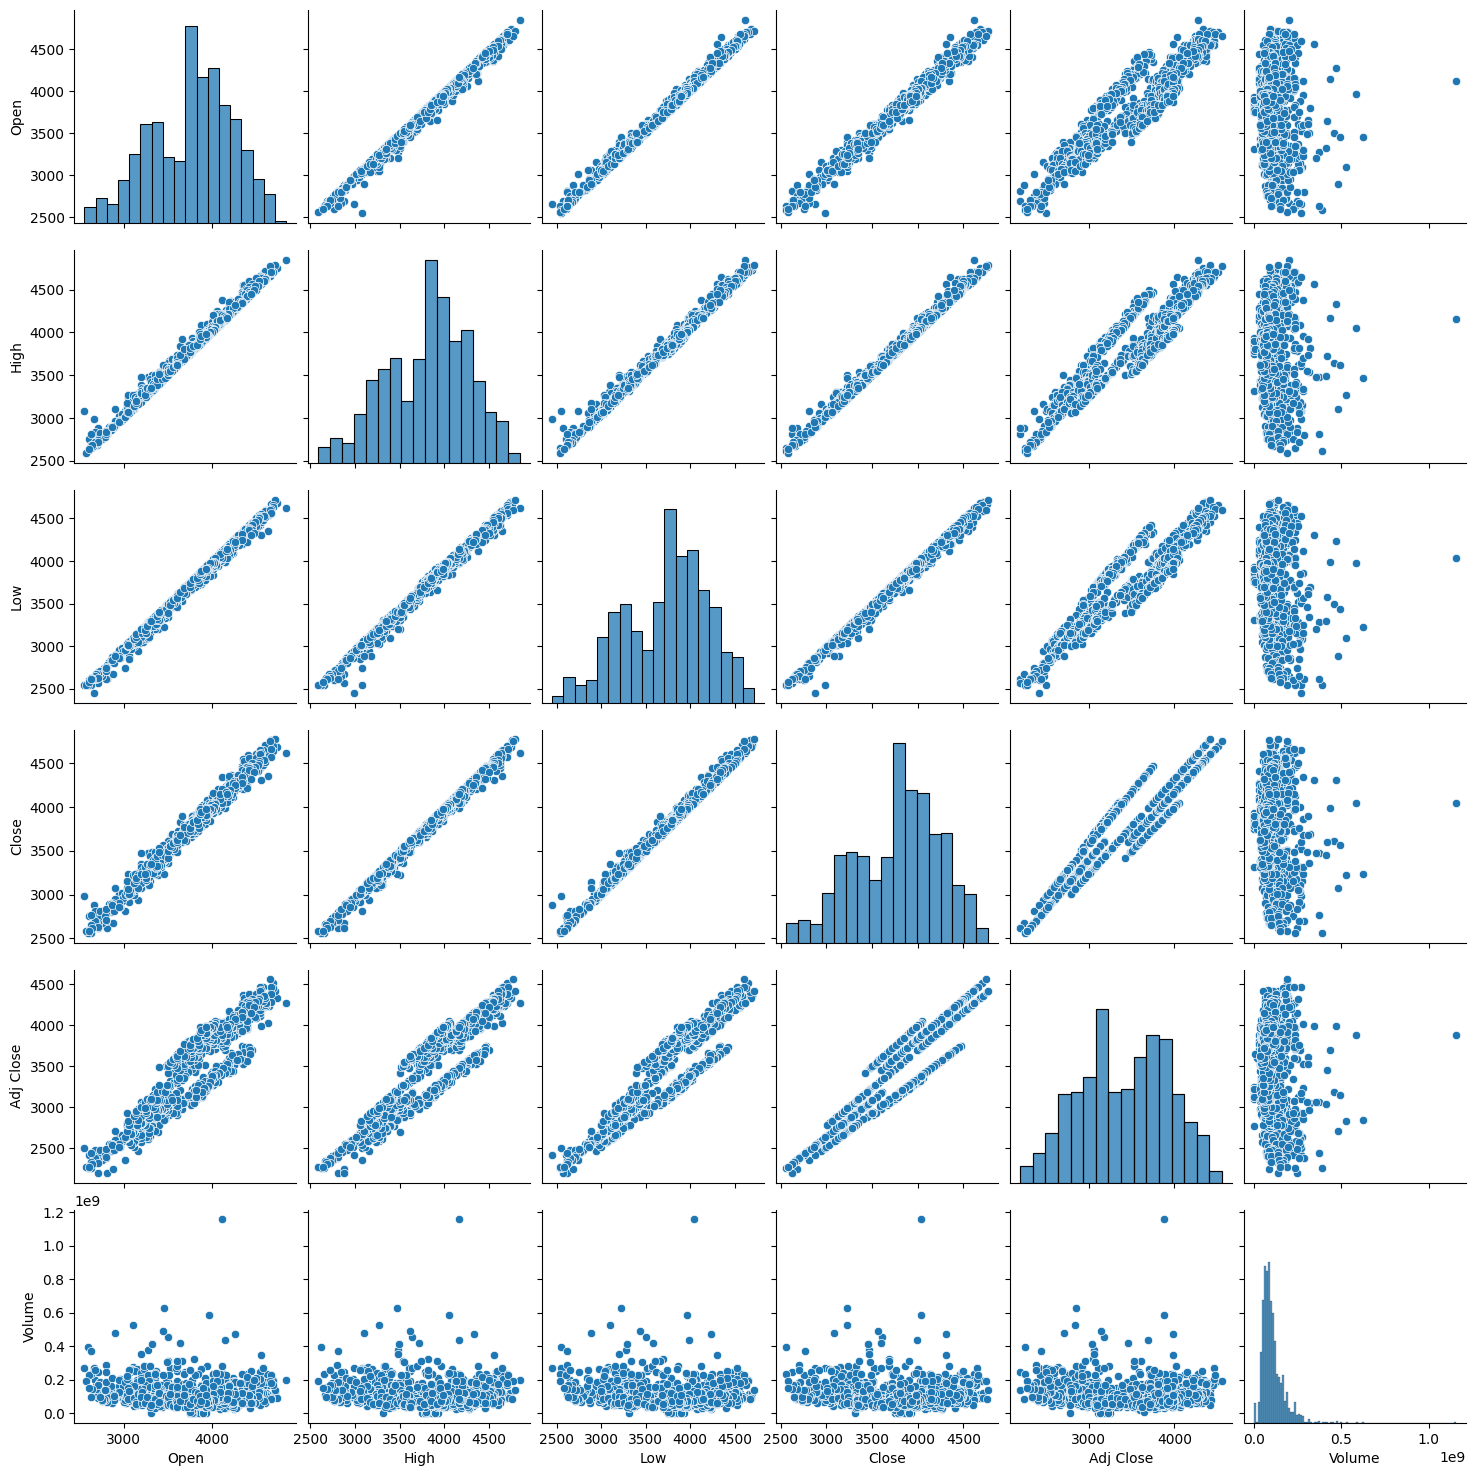

In [ ]:
# Menampilkan grafik pair plot untuk melihat hubungan antar kolom secara keseluruhan pada dataframe tlkm
sns.pairplot(tlkm)
plt.show()

In [ ]:
# Membuat variabel terkait matrik korelasi terkait dataframe tlkm
corr_matrix = tlkm.select_dtypes(include='number').corr()
print("\nMatriks Korelasi TLKM:")
print(corr_matrix)


Matriks Korelasi TLKM:
               Open      High       Low     Close  Adj Close    Volume
Open       1.000000  0.995641  0.996375  0.991499   0.900379 -0.134941
High       0.995641  1.000000  0.994892  0.996462   0.904212 -0.105655
Low        0.996375  0.994892  1.000000  0.995888   0.905362 -0.154037
Close      0.991499  0.996462  0.995888  1.000000   0.908073 -0.128867
Adj Close  0.900379  0.904212  0.905362  0.908073   1.000000 -0.083794
Volume    -0.134941 -0.105655 -0.154037 -0.128867  -0.083794  1.000000


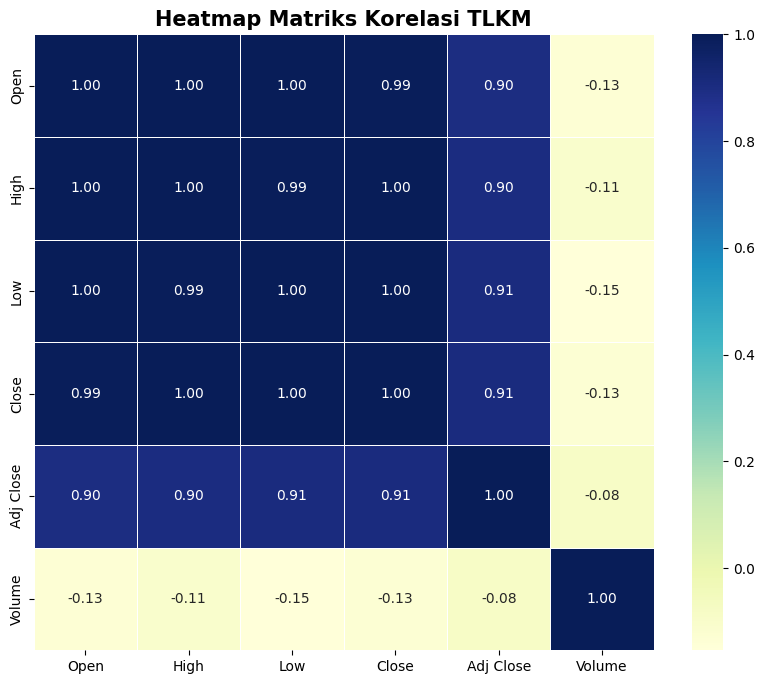

In [ ]:
# Menampilkan grafik heatmap dari matriks korelasi dataframe tlkm
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='YlGnBu', fmt=".2f", linewidths=.5)
plt.title('Heatmap Matriks Korelasi TLKM', fontsize=15, fontweight='bold')
plt.show()

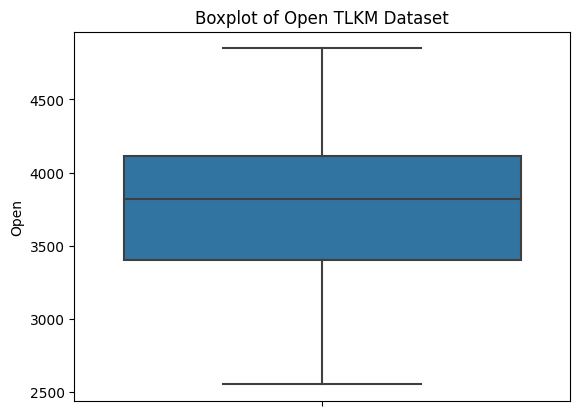

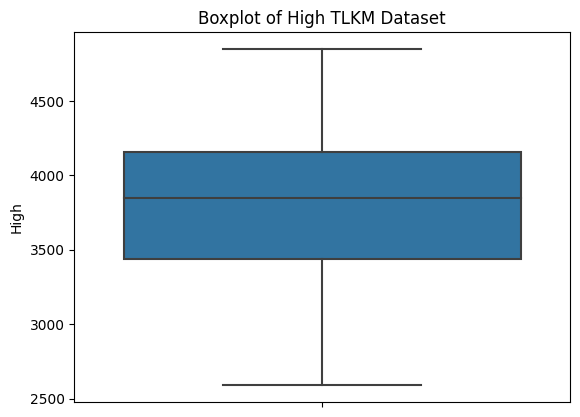

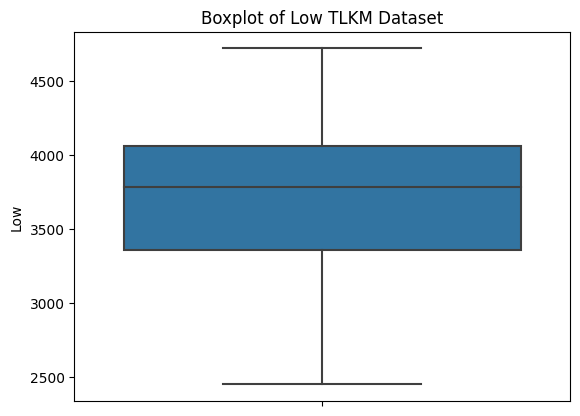

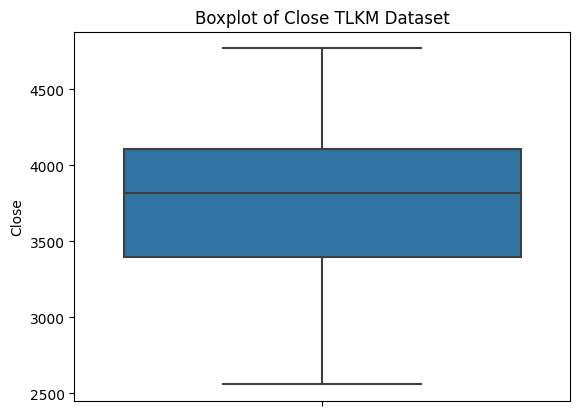

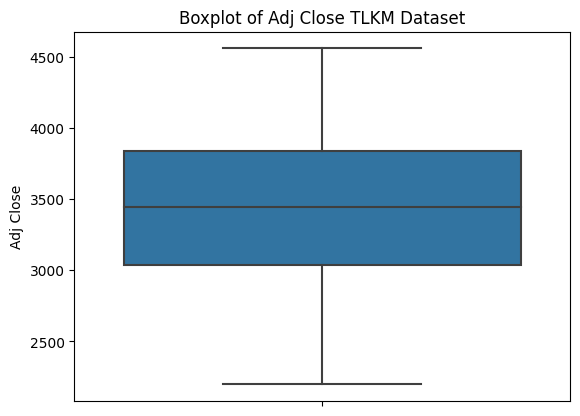

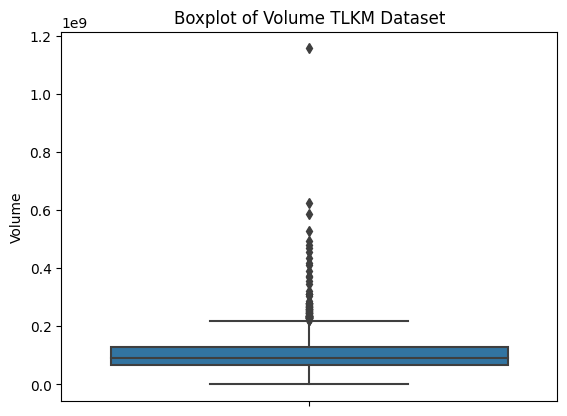

In [ ]:
# Membuat grafik boxplot dari dataset untuk mendeteksi outlier pada dataframe TLKM
sns.boxplot(y="Open", data=tlkm)
plt.title('Boxplot of Open TLKM Dataset')
plt.show()
sns.boxplot(y="High", data=tlkm)
plt.title('Boxplot of High TLKM Dataset')
plt.show()
sns.boxplot(y="Low", data=tlkm)
plt.title('Boxplot of Low TLKM Dataset')
plt.show()
sns.boxplot(y="Close", data=tlkm)
plt.title('Boxplot of Close TLKM Dataset')
plt.show()
sns.boxplot(y="Adj Close", data=tlkm)
plt.title('Boxplot of Adj Close TLKM Dataset')
plt.show()
sns.boxplot(y="Volume", data=tlkm)
plt.title('Boxplot of Volume TLKM Dataset')
plt.show()

# **Data Preprocessing**

In [ ]:
# Mengatur index kolom 'Date' sebagai dataframe index
tlkm.set_index(pd.DatetimeIndex(tlkm["Date"]),inplace=True)

In [ ]:
# Membuat dataframe 'df' dari dataframe tlkm dengan kolom 'Adj Close'
df = tlkm[['Adj Close']]
df

,Adj Close
Date,
2018-12-18,3093.818848
2018-12-19,3151.724609
2018-12-20,3093.818848
2018-12-21,3110.363281
2018-12-24,3110.363281
...,...
2023-12-11,3980.000000
2023-12-12,3910.000000
2023-12-13,3920.000000


In [ ]:
# Menampilkan informasi terkait dataframe df
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1233 entries, 2018-12-18 to 2023-12-15
Data columns (total 1 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Adj Close  1233 non-null   float64
dtypes: float64(1)
memory usage: 19.3 KB


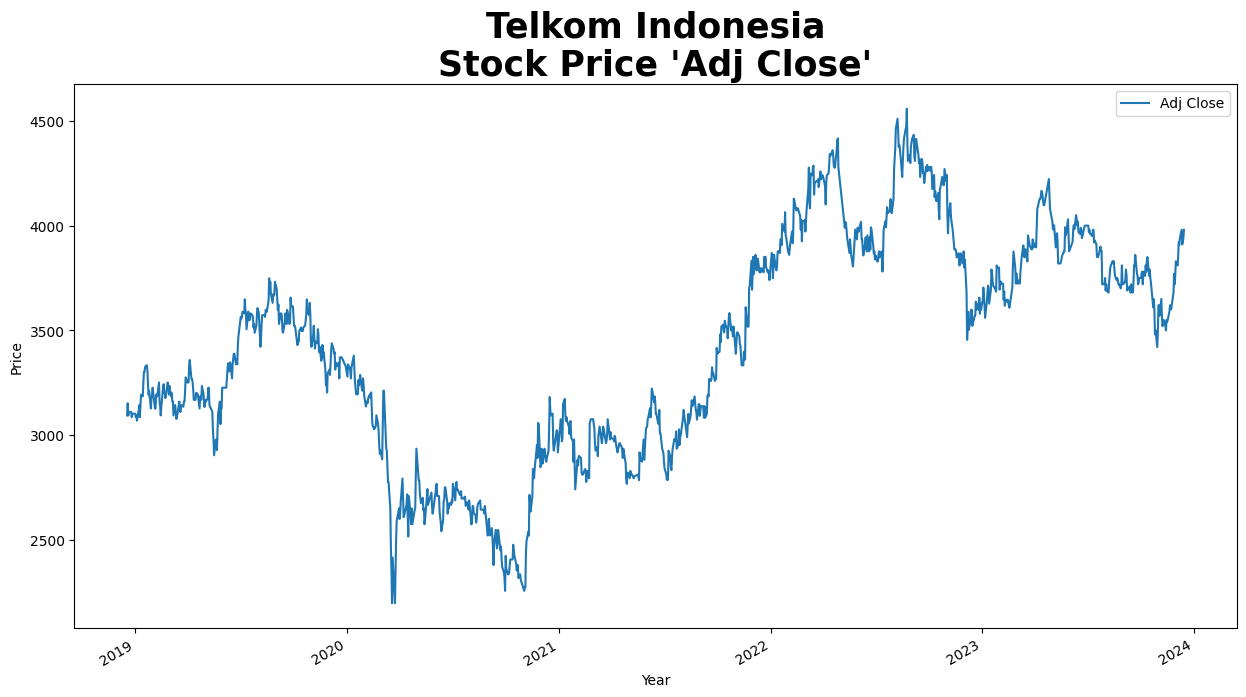

In [ ]:
# Membuat grafik terkait Adj Close pada dataframe df
df.plot.line(y="Adj Close",use_index=True,figsize=(15,8))
plt.ylabel('Price')
plt.xlabel('Year')
plt.title("Telkom Indonesia\nStock Price 'Adj Close'", fontsize=25, fontweight='bold')
plt.show()

In [ ]:
# Menghitung EMA dalam periode 10 hari
df.ta.ema(close="Adj Close",length=10,append=True)

<ipython-input-18-a7da5b569573>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.ta.ema(close="Adj Close",length=10,append=True)


Date
2018-12-18            NaN
2018-12-19            NaN
2018-12-20            NaN
2018-12-21            NaN
2018-12-24            NaN
                 ...     
2023-12-11    3853.262998
2023-12-12    3863.578816
2023-12-13    3873.837213
2023-12-14    3885.866811
2023-12-15    3902.981936
Name: EMA_10, Length: 1233, dtype: float64

In [ ]:
# Menampilkan df
df

,Adj Close,EMA_10
Date,,
2018-12-18,3093.818848,NaN
2018-12-19,3151.724609,NaN
2018-12-20,3093.818848,NaN
2018-12-21,3110.363281,NaN
2018-12-24,3110.363281,NaN
...,...,...
2023-12-11,3980.000000,3853.262998
2023-12-12,3910.000000,3863.578816
2023-12-13,3920.000000,3873.837213


In [ ]:
# Menampilkan informasi terkait dataframe df
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1233 entries, 2018-12-18 to 2023-12-15
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Adj Close  1233 non-null   float64
 1   EMA_10     1224 non-null   float64
dtypes: float64(2)
memory usage: 28.9 KB


In [ ]:
# Menghapus kolom yang ada nilai NaN
df = df.dropna()
df

,Adj Close,EMA_10
Date,,
2018-12-31,3102.091309,3106.227295
2019-01-01,3102.091309,3105.475298
2019-01-02,3085.546875,3101.851948
2019-01-03,3093.818848,3100.391384
2019-01-04,3069.002441,3094.684304
...,...,...
2023-12-11,3980.000000,3853.262998
2023-12-12,3910.000000,3863.578816
2023-12-13,3920.000000,3873.837213


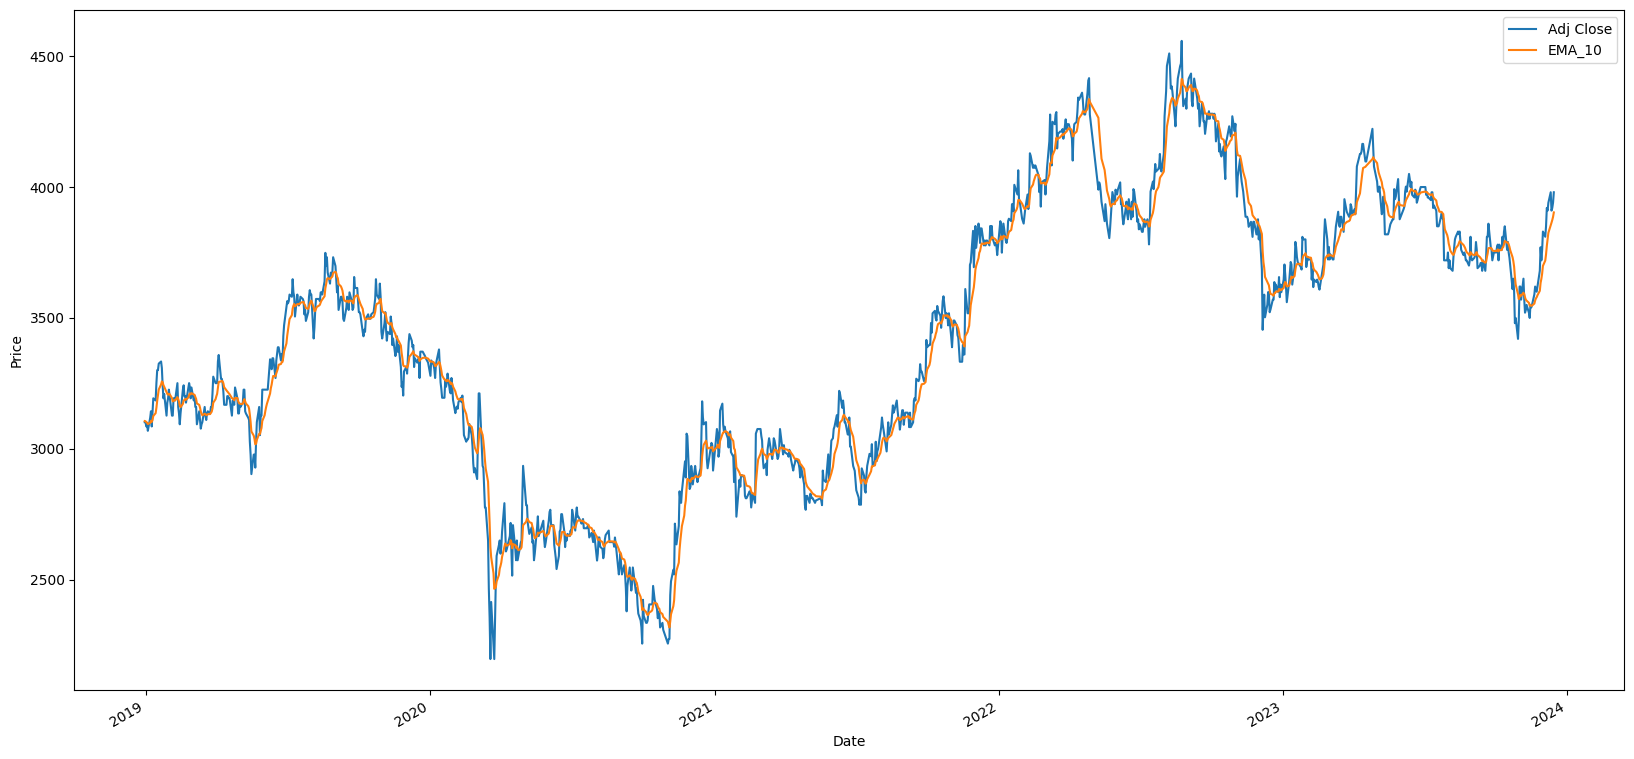

In [ ]:
# Menampilkan grafik line chart antara Adj Close dan EMA_10
df.plot.line(use_index=True,figsize=(20,10))
plt.ylabel('Price')
plt.show()

# **Build Model dengan Linear Regression**

In [ ]:
# Membuat model dengan linear regression dengan Train80% - Test20%
x_train,x_test,y_train,y_test = train_test_split(df[["Adj Close"]],df[["EMA_10"]],test_size=0.2)

In [ ]:
# Membuat model
model = LinearRegression()

# Train model
model.fit(x_train,y_train)

# Test model
y_pred = model.predict(x_test)

In [ ]:
# Evaluasi model
print("Model Coefficient: ", model.coef_)
print("Model Mean Absolute Error: ", mean_absolute_error(y_test,y_pred))
print("Model R Squared Error: ", r2_score(y_test,y_pred))
print("Model Mean Squared Error: ", mean_squared_error(y_test, y_pred))
print("Model Mean Absolute Precentage Error: ", mean_absolute_percentage_error(y_test,y_pred) * 100, "%")

Model Coefficient:  [[0.97535884]]
Model Mean Absolute Error:  50.516873315443895
Model R Squared Error:  0.9797436603247537
Model Mean Squared Error:  4844.8300285533105
Model Mean Absolute Precentage Error:  1.5270097160892513 %


# **Prediction**

In [ ]:
# Melakukan convert array ke dalam dataframe
y_pred = pd.DataFrame(y_pred)

# Menambahkan kolom Predicted
y_pred.columns = ["Predicted"]

# Mengkombinasi dataframe y_pred ke y_test
y_test['Predicted'] = y_pred['Predicted'].values

y_test

,EMA_10,Predicted
Date,,
2020-02-17,3132.726523,3035.367718
2019-12-27,3348.120858,3346.189530
2023-04-11,4003.172205,4107.228031
2021-02-10,2870.409163,2824.681396
2021-09-20,3184.701284,3260.918973
...,...,...
2022-02-23,4033.270352,4010.361039
2021-12-21,3797.626735,3838.801943
2022-01-12,3805.531335,3793.654926


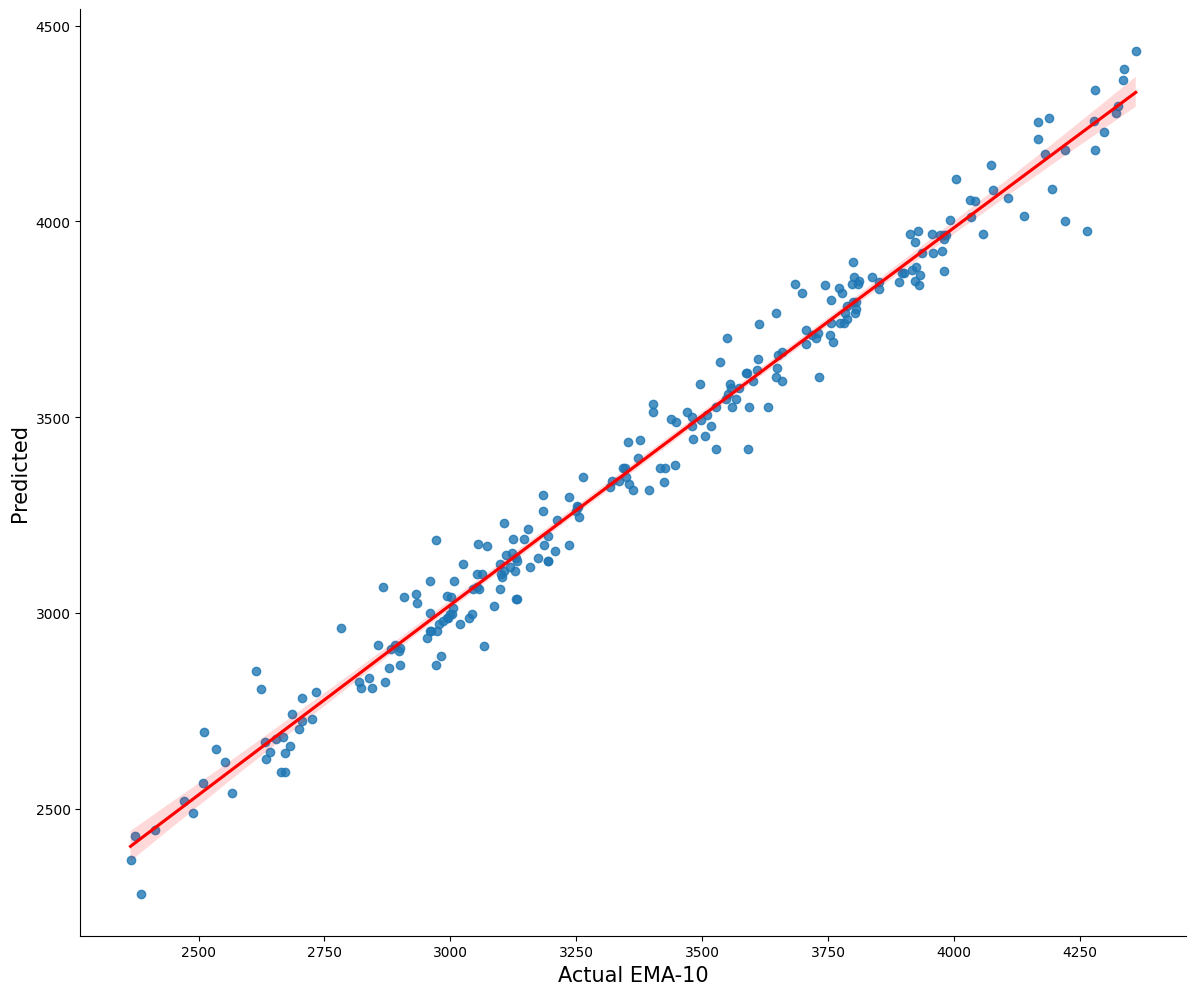

In [ ]:
# Membuat grafik terkait Actual EMA_10 dan Predicted dengan menggunakan scatter plot linear regression
sns.lmplot(x='EMA_10',y='Predicted',data=y_test,order=2, line_kws={'color':'red'} ,height=10,aspect=1.2)
plt.xlabel("Actual EMA-10",fontsize=15)
plt.ylabel("Predicted",fontsize=15)
plt.show()

In [ ]:
# Menampilkan dataframe df
df

,Adj Close,EMA_10
Date,,
2018-12-31,3102.091309,3106.227295
2019-01-01,3102.091309,3105.475298
2019-01-02,3085.546875,3101.851948
2019-01-03,3093.818848,3100.391384
2019-01-04,3069.002441,3094.684304
...,...,...
2023-12-11,3980.000000,3853.262998
2023-12-12,3910.000000,3863.578816
2023-12-13,3920.000000,3873.837213


(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, '2020-02-17 00:00:00'),
  Text(1, 0, '2019-12-27 00:00:00'),
  Text(2, 0, '2023-04-11 00:00:00'),
  Text(3, 0, '2021-02-10 00:00:00'),
  Text(4, 0, '2021-09-20 00:00:00'),
  Text(5, 0, '2021-02-04 00:00:00'),
  Text(6, 0, '2022-09-20 00:00:00'),
  Text(7, 0, '2022-08-19 00:00:00'),
  Text(8, 0, '2020-01-03 00:00:00'),
  Text(9, 0, '2023-09-13 00:00:00')])

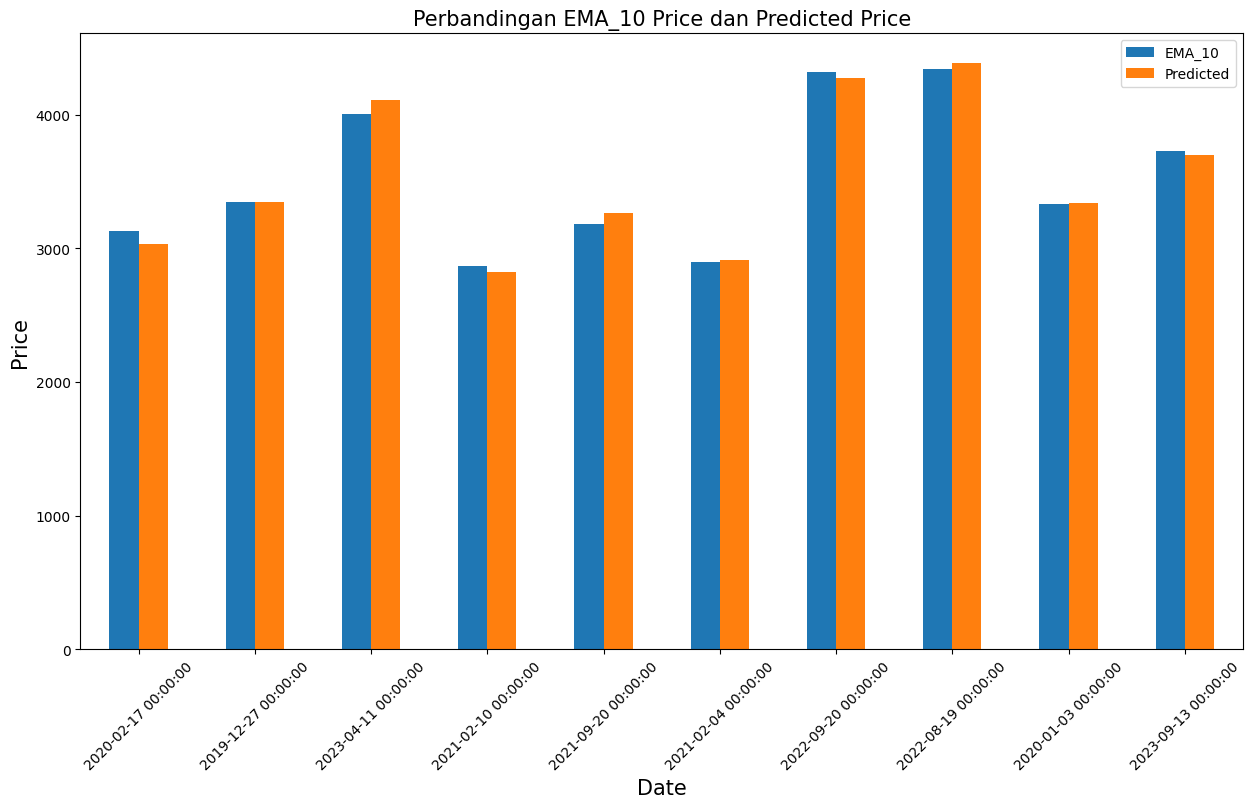

In [ ]:
# Membuat grafik barplot terkait perbandingan EMA_10 Price dan Predicted Price
y_test.head(10).plot(kind='bar',figsize=(15,8))
plt.title('Perbandingan EMA_10 Price dan Predicted Price',fontsize=15)
plt.xlabel('Date',fontsize=15)
plt.ylabel('Price',fontsize=15)
plt.xticks(rotation=45)

In [ ]:
# Membuat variabel x dari dataframe df dengan kolom Adj Close
x=df[['Adj Close']]

# Membuat variabel y_predict2 dari model.predict(x)
y_predict2 = model.predict(x)

In [ ]:
# Menambahkan kolom Predicted ke dalam dataframe df
y_predict2 = pd.DataFrame(y_predict2)
y_predict2.columns = ["Predicted"]
df['Predicted'] = y_predict2['Predicted'].values
df

<ipython-input-32-fe98197ecaea>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Predicted'] = y_predict2['Predicted'].values


,Adj Close,EMA_10,Predicted
Date,,,
2018-12-31,3102.091309,3106.227295,3108.214831
2019-01-01,3102.091309,3105.475298,3108.214831
2019-01-02,3085.546875,3101.851948,3092.078071
2019-01-03,3093.818848,3100.391384,3100.146213
2019-01-04,3069.002441,3094.684304,3075.941311
...,...,...,...
2023-12-11,3980.000000,3853.262998,3964.490837
2023-12-12,3910.000000,3863.578816,3896.215718
2023-12-13,3920.000000,3873.837213,3905.969306


In [ ]:
# Membuat dataframe df2 dari dataframe df
df2 = tlkm.iloc[9:].drop(['Date','High','Low','Close','Volume'],axis=1)

# Menambahkan kolom  'Predicted' ke dalam df2 dri nilai pada kolom 'Predicted' dataframe df
df2['Predicted'] = df['Predicted'].values

# Menambahkan kolom  'Difference' ke dalam df2 dri nilai pada kolom 'Open' dataframe tlkm dikurangi nilai pada kolom 'Predicted' pada dataframe df
df2['Difference'] = df2['Open'] - df2['Predicted']
df2

,Open,Adj Close,Predicted,Difference
Date,,,,
2018-12-31,3750.0,3102.091309,3108.214831,641.785169
2019-01-01,3750.0,3102.091309,3108.214831,641.785169
2019-01-02,3750.0,3085.546875,3092.078071,657.921929
2019-01-03,3710.0,3093.818848,3100.146213,609.853787
2019-01-04,3690.0,3069.002441,3075.941311,614.058689
...,...,...,...,...
2023-12-11,3870.0,3980.000000,3964.490837,-94.490837
2023-12-12,3940.0,3910.000000,3896.215718,43.784282
2023-12-13,3870.0,3920.000000,3905.969306,-35.969306


In [ ]:
# Menambahkan kolom 'Decision' ke dalam dataframe df2 dengan ketentuan Buy, Sell, atau Hold
df2['Decision'] = df2['Difference'].apply(lambda x: 'Sell' if x > 0 else('Buy' if x < 0 else 'Hold'))

In [ ]:
# Membuat variabel a berdasarkan nilai pada kolom 'Decision' dari dataframe df2
a = df2['Decision'].value_counts()
pd.DataFrame(a)

,Decision
Sell,1171
Buy,53


In [ ]:
# Menampilkan dataframe df2
df2

,Open,Adj Close,Predicted,Difference,Decision
Date,,,,,
2018-12-31,3750.0,3102.091309,3108.214831,641.785169,Sell
2019-01-01,3750.0,3102.091309,3108.214831,641.785169,Sell
2019-01-02,3750.0,3085.546875,3092.078071,657.921929,Sell
2019-01-03,3710.0,3093.818848,3100.146213,609.853787,Sell
2019-01-04,3690.0,3069.002441,3075.941311,614.058689,Sell
...,...,...,...,...,...
2023-12-11,3870.0,3980.000000,3964.490837,-94.490837,Buy
2023-12-12,3940.0,3910.000000,3896.215718,43.784282,Sell
2023-12-13,3870.0,3920.000000,3905.969306,-35.969306,Buy


In [ ]:
# Menampilkan terkait ringkasan statistik deskriptif pada dataframe df2
df2.describe()

,Open,Adj Close,Predicted,Difference
count,1224.000000,1224.000000,1224.000000,1224.000000
mean,3774.338235,3417.633900,3415.982088,358.356147
std,468.972594,518.512962,505.736203,219.405921
min,2550.000000,2197.174072,2225.595802,-94.490837
25%,3400.000000,3031.723389,3039.580858,195.277503
50%,3820.000000,3458.708618,3456.044678,335.418509
75%,4110.000000,3841.878174,3829.772492,574.575202
max,4850.000000,4558.169922,4528.413983,841.143190


In [ ]:
# Menyimpan hasil dari df2 ke file csv
df2.to_csv('TLKM.JK-Output.csv')